In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [139]:
import imageio

# roman = imageio.imread("roman-bw.jpg")
roman = imageio.imread("mit-gray.png")
print(roman.shape)
print(roman)
roman = 255 - roman
roman_flat = roman.reshape((roman.shape[0] * roman.shape[1],))
roman_flat = roman_flat / np.sum(roman_flat)
print(roman_flat.shape)
print(roman_flat)

(1034, 2000)
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
(2068000,)
[9.30997955e-07 9.30997955e-07 9.30997955e-07 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [143]:
# position the roman picture such that its lower right is (0.01, -0.01) and its flipped
# and each pixel is length 0.01
SCALE = 0.001
X = roman.shape[1]
Y = roman.shape[0]
roman_pos = np.array([[SCALE * (-X/2 + b + Y/2 * 1j - a * 1j) for b in range(roman.shape[1])] for a in range(roman.shape[0])])
roman_pos = roman_pos.reshape((roman_flat.shape[0],))
print(roman_pos)

def sample_from_roman(size=None):
    return np.random.choice(a=roman_pos, size=size, p=roman_flat)

print("Samples:", sample_from_roman((5, 5)))

[-1.   +0.517j -0.999+0.517j -0.998+0.517j ...  0.997-0.516j  0.998-0.516j
  0.999-0.516j]
Samples: [[ 0.64 -0.02j  -0.092-0.317j -0.84 +0.326j  0.282-0.287j -0.613+0.16j ]
 [ 0.256+0.154j -0.594+0.491j -0.221-0.206j  0.15 +0.356j  0.61 +0.067j]
 [ 0.194+0.114j -0.842-0.377j  0.191+0.473j -0.254+0.154j  0.591+0.03j ]
 [-0.983+0.301j -0.456+0.498j -0.1  +0.251j  0.194-0.25j   0.604+0.167j]
 [ 0.129-0.066j  0.226+0.416j  0.685+0.333j -0.597+0.427j  0.214+0.332j]]


In [193]:
def perturb_and_plot_roots(base_poly, num_samples=100, stdev=1, hist2dbins=512):
    # perturb = np.random.normal(
    #     size=(num_samples, base_poly.shape[0], 2),
    #     scale=stdev
    # ).view(np.complex128)[:, :, 0]
    perturb = sample_from_roman((num_samples, base_poly.shape[0]))
    perturb[:, 0] = 0
    
    polys = base_poly + perturb
    
    roots = np.zeros((num_samples, base_poly.shape[0] - 1), dtype=np.complex128)
    for i in range(num_samples):
        roots[i] = np.roots(polys[i])
        
    plt.figure(figsize=(18,4))
    
    plt.subplot(1, 3, 1)
    plt.hist2d(
        x=roots.flatten().real,
        y=roots.flatten().imag,
        range=((-1.5, 1.5), (-1.5, 1.5)),
        bins=hist2dbins,
        # cmap="gray",
    )
    plt.axis("square")
    # plt.xlabel("real part")
    # plt.ylabel("imaginary part")
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    # plt.title(f"Heatmap of roots with n={base_poly.shape[0] - 1}")
    plt.xticks([-1, 0, 1], size = 15)
    plt.yticks([-1, 0, 1], size = 15)
    plt.savefig(f"img/heatmap-{base_poly.shape[0] - 1}.png", dpi=300, transparent=True)
    
    plt.subplot(1, 3, 2)
    root_radii = np.absolute(roots.flatten())
    plt.hist(
        root_radii,
        bins=256,
        range=(0, 2),
        density=True,
    )
    # plt.xlabel("magnitude")
    # plt.ylabel("proportion of roots")
    # plt.title(f"Distribution of root magnitudes with n={base_poly.shape[0] - 1}")
    plt.xticks([0, 1, 2], size = 15)
    plt.yticks([])
    plt.savefig(f"img/magnitude-{base_poly.shape[0] - 1}.png", dpi=300, transparent=True)

    plt.subplot(1, 3, 3)
    plt.hist(
        np.angle(roots.flatten()) + np.pi,
        bins=256,
        density=True,
    )
    # plt.xlabel("radian")
    # plt.ylabel("proportion of roots")
    # plt.title(f"Distribution of root arguments with n={base_poly.shape[0] - 1}")
    plt.xticks([0, np.pi, 2 * np.pi], labels=["0", "π", "2π"], size = 15)
    plt.yticks([])
    plt.savefig(f"img/argument-{base_poly.shape[0] - 1}.png", dpi=300, transparent=True)


Wall time: 3.59 s


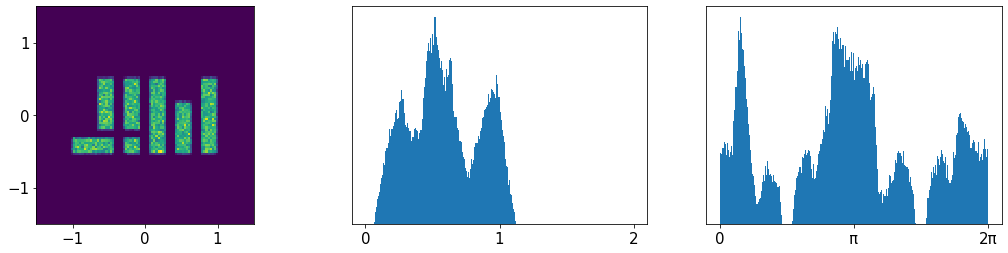

In [194]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 1 * [0], dtype=np.complex128),
    num_samples=50000,
    hist2dbins=100,
)

Wall time: 2.52 s


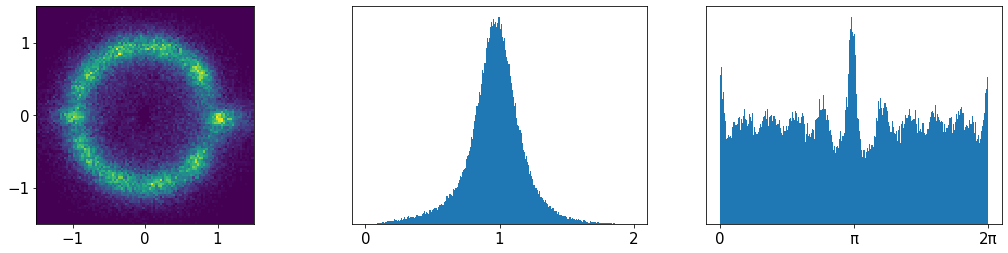

In [195]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 10 * [0], dtype=np.complex128),
    num_samples=10000,
    hist2dbins=100,
)

Wall time: 50.7 s


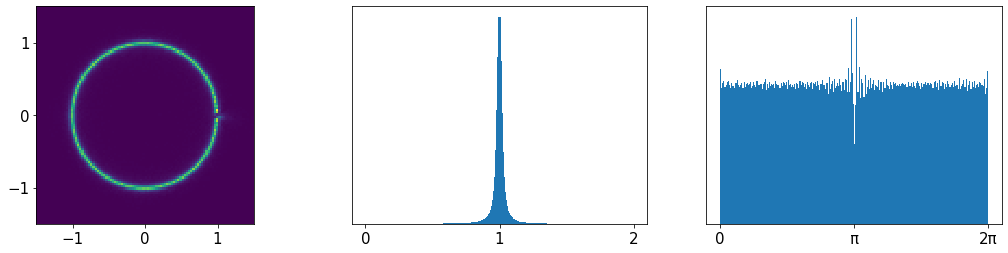

In [196]:
%%time
perturb_and_plot_roots(
    base_poly=np.array([1] + 100 * [0], dtype=np.complex128),
    num_samples=5000,
    hist2dbins=100,
)